# <span style = "color:#03520a ; font-family:sans serif"> Cross Validation & Grid Search </span>

### <span style = "color:#03520a ; font-family:sans serif"> Cross Validation in Detail
* Train | Test Split
* Train | Validation | test Split
* Scikit_Learn cross_val_score
* Scikit_Learn cross_validated

## <span style = "color:#03520a ; font-family:sans serif"> Grid Search

### <span style = "color:#03520a ; font-sans serif"> We will start with basic (Test | Train split) and then slowly build up tp the full K-fold Validation

## <span style = "color:#03520a ; font-family:sans serif"> Train | Test Split

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("Advertising.csv")

In [106]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## <span style = "color:#03520a ; font-family:sans serif"> Train | Test split Procedure
1. Clean and adjust data as necessary for X and y
2. Split data in Train/Test for both X and y
3. Fit/Train Scaler on Training X Data
4. Scale X Test Data
5. Create Model
6. Fit/Train Model on X Train Data
7. Evaluate Model on X Test data(by creating predictions and comparing to Y_test)
8. Adjust Parameters as Necessary and repeate 6 and 7

In [107]:
X = df.drop("sales", axis = 1)

In [108]:
y = df["sales"]

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## <span style = "color:#03520a ; font-family:sans serif"> Above we have completed the train test split

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

In [113]:
scaler.fit(X_train)

StandardScaler()

In [114]:
X_train = scaler.transform(X_train)

In [115]:
X_test =scaler.transform(X_test)

### <span style = "color:red ; font-family:sans serif">Always remember we only fit X_train and transfrom X_train and X_test. y is not be scaled

In [116]:
from sklearn.linear_model import Ridge

In [117]:
model = Ridge(alpha = 100)

In [118]:
model.fit(X_train ,y_train)

Ridge(alpha=100)

In [119]:
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mean_squared_error(y_test,y_pred)

7.34177578903413

### <span style = "color:#03520a ; font-family:sans serif"> We have high mean squared error in comparison to the last time we did the same.

## <span style = "color:#03520a ; font-family:sans serif"> Let's Discuss some advantages and disadvantages of simple Test | train Split</span>
## <span style = "color:#03520a ; font-family:sans serif">Advantages
* It is quite easy to do
* It saves the computation time if we have a very large data set
* Simple and intuitive </span>
## <span style = "color:#03520a ; font-family:sans serif">Disadvantages
* Getting optimal hyperparameter value is quite tedious as we need to the same steps again and again
* The another major issue is when we tune hyperparameters to get the test results, model actual sees the whole data again and again.

## <span style = "color:#03520a ; font-family:sans serif"> Cross Validation</span>
### <span style = "color:#03520a ; font-family:sans serif">Train | Validation | Test Split

#### <span style = "color:#03520a ; font-family:sans serif">If we want a truly and fair set of performance metrics, We should get these metrics from a final test set that we do not allow ourselves to adjust on.

## <span style = "color:#03520a ; font-family:sans serif"> Split the data: Train, Validation, and Test.</span>
### <span style = "color:#03520a ; font-family:sans serif"> Ideal situation you keep 70% for training and 15% on validation and 15% on test, but this can be change as per the Dataset size</span>

### <span style = "color:#03520a ; font-family:sans serif"> To do train , test and validation split we will call the train test split twice.

In [122]:
df2 = pd.read_csv("Advertising.csv")

In [123]:
df2.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [124]:
X=df2.drop("sales",axis = 1)

In [125]:
y = df["sales"]

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.30, random_state=101)

In [128]:
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=101)

In [129]:
len(df2)

200

In [130]:
len(X_train)

140

In [131]:
len(X_eval)

30

In [132]:
len(X_test)

30

### <span style = "color:#03520a ; font-family:sans serif"> As we can see from above the train test split has been done twice with X_ohter in replacement of X_test and second with X_eval in place of X_train and in parameter of second train test split X amd Y paramters were changed to X_ohter and y_other. Our length of X_train, X_eval, X_test is equal to length of total DataFrame.

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
scaler.fit(X_train)

StandardScaler()

### <span style = "color:#03520a ; font-family:sans serif">We can see form above we will do scaler.transfrom on all thre to X_train, X_eval, X_test

In [136]:
X_train = scaler.transform(X_train)

In [137]:
X_eval = scaler.transform(X_eval)

In [138]:
X_test = scaler.transform(X_test)

In [139]:
from sklearn.linear_model import Ridge

In [140]:
model_one = Ridge(alpha = 100)

In [141]:
model_one.fit(X_train, y_train)

Ridge(alpha=100)

In [142]:
y_eval_predict = model.predict(X_eval)

In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
mean_squared_error(y_eval,y_eval_predict)

7.320101458823871

In [145]:
model_two = Ridge(alpha = 1)

In [146]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [147]:
new_pred_eval = model_two.predict(X_eval)

In [148]:
mean_squared_error(y_eval,new_pred_eval)

2.383783075056986

### <span style = "color:#03520a ; font-family:sans serif"> This way we can do hypertuning of parameters like we did for alpha and keep some data avaiable as X_test for final performance test.

In [149]:
y_final_test_pred = model_two.predict(X_test)

In [150]:
mean_squared_error(y_test,y_final_test_pred)

2.254260083800517

### <span style = "color:red ; font-family:sans serif"> This is our final model evalutaiton on hold out dataset "y_test", there is no going back and tunining any hyperparameters now

#### <span style = "color:#03520a ; font-family:sans serif"> When it comes to deployment to the real world is going to be Fit and trained to the entire dataset just the X and y.

# <span style = "color:#03520a ; font-family:sans serif">Cross Validation - Using the cross_val_score funciton

## <span style = "color:#03520a ; font-family:sans serif"> K_fold cross validation</span>
## <span style = "color:#03520a ; font-family:sans serif"> The cross_val_score is sklearn inbuilt fucntion which uses a model and training set(along with a K and chosed metric) to perform all of this for us automatically!</span>
## <span style = "color:#03520a ; font-family:sans serif"> This allows for K_fold Cross Validation to be perfromed on any model</span>

In [151]:
df3 = pd.read_csv("Advertising.csv")

In [152]:
df3.head

<bound method NDFrame.head of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

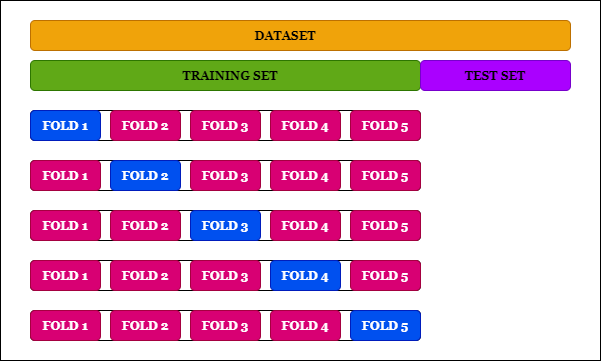

#### <span style = "color:#03520a ; font-family:sans serif"> The above example of K = 5, K-fold corss validation.
* First we have all the dataset
* Then data is divied to training and Final hold out test set on which final performance evaluation will be done once we are satsifed with final model
* Withing training dataset, each blue bars works as K-fold
* With these K-fold validation we find best parameters

In [158]:
X = df3.drop("sales", axis = 1)

In [159]:
y = df3["sales"]

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### <span style = "color:#03520a ; font-family:sans serif"> Here one thing to be noted that test size  can be reduced, we don't need as large as 30% in this scenario.We have used it here just for the standard we have followed so far!

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [164]:
scaler.fit(X_train)

StandardScaler()

In [165]:
X_train= scaler.transform(X_train)

In [166]:
X_test = scaler.transform(X_test)

In [167]:
model = Ridge(alpha=100)

## <span style = "color:#03520a ; font-family:sans serif"> Now here we will import cross_val_score from Sklear.model_selection

In [168]:
from sklearn.model_selection import cross_val_score

### <span style = "color:#03520a ; font-family:sans serif"> Let's check some parameters of cross_val_score before we proceed
* estimator = it's sklear own term for machine learning model
* X = X_train
* y = y_train
* cv = number of K-folds
* scoring = it is the error which gets reported back from a scoring metric
* We can refer to scoring metric anytime by visting(https://scikit-learn.org/stable/modules/model_evaluation.html)
* Remember All scorer objects follow the convention that higher return values are better than lower return values.Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [169]:
scores = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv = 5)

In [170]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [171]:
abs(scores.mean())

8.215396464543607

### <span style = "color:#03520a ; font-family:sans serif">Certainly this is not the good model, but now what we can do here is change the model ann apply it again to scores

In [172]:
model = Ridge(alpha=1)

In [173]:
scores = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv = 5)

In [175]:
scores

array([-3.15513238, -1.58086982, -5.40455562, -2.21654481, -4.36709384])

## <span style = "color:#03520a ; font-family:sans serif"> The array retrun with scores contains negative mean squared error our evaluation metrics for 5 folds which we selected with CV

In [176]:
abs(scores.mean())

3.344839296530695

### <span style = "color:#03520a ; font-family:sans serif"> These Test Results are not upto the last time we did because this is results of train set and its validation. we have not included the test set yet.We will create the model again with the complete set.

In [177]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [178]:
y_final_test_pred = model.predict(X_test)

In [179]:
mean_squared_error(y_test,y_final_test_pred)

2.319021579428752

### <span style = "color:#03520a ; font-family:sans serif"> This is the final test result which we can expect in real world when model is deployed

# <span style = "color:#03520a ; font-family:sans serif"> Another Sklearn Function cross_validate

## <span style = "color:#03520a ; font-family:sans serif"> This function allows us to view multiple performace metrics from cross validation on a model adn explore how much time fitting and testing took

In [183]:
# Lets create X and Y
X= df3.drop('sales', axis =1)
y = df3["sales"]

## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
## Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
from sklearn.model_selection import cross_validate

In [185]:
model = Ridge(alpha=100)

In [186]:
scores = cross_validate(model, X_train, y_train,scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], cv= 10)

In [188]:
scores = pd.DataFrame(scores)

In [189]:
scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.003002,0.000999,-1.810212,-6.060671
1,0.001999,0.001999,-2.541958,-10.627031
2,0.001999,0.001002,-1.469594,-3.993426
3,0.000996,0.001005,-1.862769,-5.009494
4,0.000998,0.001000,-2.520697,-9.141800
5,0.002002,0.001000,-2.459995,-13.086256
6,0.000998,0.001001,-1.451971,-3.839405
7,0.000996,0.000000,-2.377395,-9.058786
8,0.001004,0.000995,-2.443344,-9.055457
9,0.000998,0.000000,-1.899797,-5.778882


In [190]:
scores.mean()

fit_time                        0.001499
score_time                      0.000900
test_neg_mean_absolute_error   -2.083773
test_neg_mean_squared_error    -7.565121
dtype: float64

In [191]:
model = Ridge(alpha=1)

In [192]:
scores = cross_validate(model, X_train, y_train,scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], cv= 10)

In [193]:
scores = pd.DataFrame(scores)

In [195]:
scores.mean()

fit_time                        0.001100
score_time                      0.000901
test_neg_mean_absolute_error   -1.308467
test_neg_mean_squared_error    -3.323018
dtype: float64

#### <span style = "color:#03520a ; font-family:sans serif"> As we can see from the above that cross_validate allowed us to use two scoring metrics together and brings the score in a form of dictonary which can be changed to DataFrame for better viewing and see all 10 folds resuls. Also if you want to the see the mean of 10 folds we can simply to score.mean()

### <span style = "color:#03520a ; font-family:sans serif"> Once we are Satsifed with model we can create final model

In [196]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [197]:
y_final_test_pred = model.predict(X_test)

In [198]:
mean_squared_error(y_test,y_final_test_pred)

2.319021579428752

#### <span style = "color:#03520a ; font-family:sans serif"> This will be final model which we will report out and use it for future deployment

# <span style = "color:#03520a ; font-family:sans serif" class="bolded"> Grid Search

## <span style = "color:#03520a ; font-family:sans serif " >Often more complex models have multiple adjustable hyperparameters.</span>
## <span style = "color:#03520a ; font-family:sans serif"> A grid seach is way of training and validating a model on every possibe combination of multiple hyperparameter options.

## <span style = "color:#03520a ; font-family:sans serif"> Scikit-Learn includes a GridSearchCV class callable of testing a dictonary of multiple hyperparameter options throug cross_validation.</span>
## <span style = "color:#03520a ; font-family:sans serif"> This allows for both cross_validation and a grid search to be performed in a generalized way for any model.

In [199]:
df4 = pd.read_csv("Advertising.csv")

In [200]:
df4.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [201]:
# Lets create X and Y
X= df4.drop('sales', axis =1)
y = df4["sales"]

## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
## Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
from sklearn.linear_model import ElasticNet

## <span style = "color:#03520a ; font-family:sans serif"> Here we chose ElsticNet just to show how GridSeach work becasue if we remember from Elastic Net it taked the ratio L1 i.e. Lasso and L2 i.e. Ridge</span>

In [ ]:
base_elastic_model = ElasticNet()# we are creating a intance without any hyperparameters

In [206]:
param_grid = {'alpha':[0.1,1,5,10,50,100], 'l1_ratio':[.1,.5,.7,.95,.99,1]}# we create keys based on the hyperparamters of the model

#### <span style = "color:red ; font-family:sans serif"> One thing to always keep in mind while creating keys, that should exatly match with hyperparameters

In [204]:
from sklearn.model_selection import GridSearchCV

In [207]:
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=pram_grid,
                          scoring="neg_mean_squared_error",cv = 5, verbose=2)

In [208]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.0s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.0s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.99, total=   0.0s
[CV] alpha=5, l1_ratio=0.99 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [209]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

### <span style = "color:#03520a ; font-family:sans serif" class="bolded"> It gave us the best hyperprameters value so we don't need to change the model again and again do the same think as we did with Cross Validate or cross_val_score before

In [211]:
grid_model.best_params_ # it provides the same thing in dictonary form 

{'alpha': 0.1, 'l1_ratio': 1}

### <span style = "color:#03520a ; font-family:sans serif" class="bolded"> To see how the other values of parameters did we can do the following

In [212]:
grid_model.cv_results_ # it brings the dictonary of results which can be later changed to DataFrame

{'mean_fit_time': array([0.00119948, 0.00099983, 0.00152969, 0.00119457, 0.00079947,
        0.00099912, 0.00099816, 0.00119743, 0.00120006, 0.00099926,
        0.00100021, 0.00080113, 0.00079908, 0.00099974, 0.00100121,
        0.00199909, 0.00040069, 0.00119958, 0.00120068, 0.00399985,
        0.00100198, 0.0014008 , 0.00099902, 0.00099993, 0.00119953,
        0.00100288, 0.00119791, 0.00099974, 0.00099983, 0.00120187,
        0.00100069, 0.00099959, 0.00099864, 0.0010025 , 0.00119896,
        0.0010006 ]),
 'std_fit_time': array([3.99124864e-04, 6.30379509e-04, 6.77265800e-04, 3.90959440e-04,
        3.99767016e-04, 4.05059063e-06, 1.89298947e-06, 4.00501022e-04,
        4.00496679e-04, 2.83467559e-06, 6.33243111e-04, 4.00574161e-04,
        3.99546991e-04, 2.09699950e-06, 3.08510325e-06, 1.99761397e-03,
        4.90738916e-04, 3.99544942e-04, 4.01378368e-04, 6.00032807e-03,
        4.55273371e-06, 8.00325660e-04, 6.32788985e-04, 2.79672209e-06,
        3.98373814e-04, 4.17498095e-0

In [213]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001199,0.000399,0.000800,0.000400,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.001000,0.000630,0.000802,0.000401,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.001530,0.000677,0.000302,0.000401,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.001195,0.000391,0.000200,0.000399,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000799,0.000400,0.000399,0.000489,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.000999,0.000004,0.000602,0.000492,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.000998,0.000002,0.000201,0.000402,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.001197,0.000401,0.000603,0.000493,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.001200,0.000400,0.000399,0.000489,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.000999,0.000003,0.001001,0.000002,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


## <span style = "color:#03520a ; font-family:sans serif" class="bolded"> If we are not satified with the current results we can change the values of prameters in param_grid and re-run the model

In [214]:
y_pred = grid_model.predict(X_test)

In [215]:
from sklearn.metrics import mean_squared_error

In [216]:
mean_squared_error(y_test,y_pred)

2.3873426420874737